# Statistiques descriptives 

# Modules utiles

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns
import sklearn.preprocessing 
from sklearn.preprocessing import scale 


c:\Users\elelo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Données ENEDIS

"Ce jeu de données restitue la consommation d’électricité au pas 1/2h des points de soutirage <= 36kVA raccordés au réseau Enedis. Il donne les volumes d'énergie soutirés, les courbes de charge moyennes de clients dotés de compteurs communicants et le nombre de clients. Ces agrégats sont disponibles par plage de puissance souscrite, profil et région."

Dictionnaire des variables : https://data.enedis.fr/api/datasets/1.0/conso-inf36-region/attachments/note_externe_jdd_article_23_pdf/

In [2]:
enedis=pd.read_csv("C:/Users/elelo/Documents/ENSAE/Statt app/Données/conso-inf36-region.csv",sep=";")

On récupère la date :

In [4]:
## On extrait la date pour classifier par jour 
enedis["date"]=enedis["Horodate"].apply(lambda x : x[0:10])
enedis

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),Indice représentativité Courbe n°2 (%),Courbe Moyenne n°1 + n°2 (Wh),Indice représentativité Courbe n°1 + n°2 (%),Jour max du mois (0/1),Semaine max du mois (0/1),date
0,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,ENT3 (+ ENT4 + ENT5),P0: Total <= 36 kVA,1376,2095739.0,2084.0,48,1368.0,48,1727.0,97,0,1,2022-09-30
1,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P4: ]9-12] kVA,52691,12376840.0,443.0,8,202.0,8,322.0,16,0,1,2022-09-30
2,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P8: ]24-30] kVA,8350,6545703.0,1012.0,10,474.0,11,742.0,22,0,1,2022-09-30
3,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO2 (+ PRO2WE + PRO6),P3: ]6-9] kVA,19759,7072016.0,693.0,13,466.0,13,579.0,26,0,1,2022-09-30
4,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO5,P1: ]0-3] kVA,55645,18921676.0,428.0,16,239.0,16,334.0,33,0,1,2022-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108994,2022-07-06T00:00:00+02:00,Île-de-France,11,PRO2 (+ PRO2WE + PRO6),P6: ]15-18] kVA,15355,12666774.0,1613.0,13,1001.0,13,1307.0,26,0,0,2022-07-06
4108995,2022-07-06T00:00:00+02:00,Île-de-France,11,PRO3,P4: ]9-12] kVA,370,436549.0,NaN,S,NaN,S,NaN,S,0,0,2022-07-06
4108996,2022-07-06T00:00:00+02:00,Île-de-France,11,PRO5,P3: ]6-9] kVA,3148,6923922.0,725.0,27,774.0,27,749.0,55,0,0,2022-07-06
4108997,2022-07-06T00:00:00+02:00,Île-de-France,11,RES1 (+ RES1WE),P0: Total <= 36 kVA,3476435,287893977.0,90.0,< 1,73.0,< 1,82.0,1,0,0,2022-07-06


## Statistiques descriptives sur bdd enedis

*Statistiques univariées :*

In [6]:
enedis["Plage de puissance souscrite"].value_counts()

P0: Total <= 36 kVA    651429
P5: ]12-15] kVA        501103
P6: ]15-18] kVA        450992
P4: ]9-12] kVA         450987
P9: ]30-36] kVA        350771
P3: ]6-9] kVA          300654
P8: ]24-30] kVA        250550
P7: ]18-24] kVA        250545
P1: ]0-3] kVA          150329
P1: ]0-6] kVA          150327
P1: ]0-9] kVA          150326
P2: ]3-6] kVA          150326
P7: ]18-30] kVA        100220
P7: ]18-36] kVA        100218
P1 : ]0-12] kVA         50111
P6: ]15-36] kVA         50111
Name: Plage de puissance souscrite, dtype: int64

In [ ]:
enedis["Plage de puissance souscrite"] 

Région,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Grand-Est,Hauts-de-France,Normandie,Nouvelle Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,Île-de-France
Plage de puissance souscrite,,,,,,,,,,,,
P0: Total <= 36 kVA,0.013211,0.013211,0.013211,0.013212,0.013211,0.013212,0.013211,0.013211,0.013211,0.013211,0.013212,0.013211
P1 : ]0-12] kVA,0.001016,0.001016,0.001016,0.001016,0.001016,0.001016,0.001016,0.001016,0.001016,0.001016,0.001016,0.001016
P1: ]0-3] kVA,0.003049,0.003049,0.003049,0.003048,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049
P1: ]0-6] kVA,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003048,0.003049,0.003049,0.003049,0.003049
P1: ]0-9] kVA,0.003049,0.003049,0.003049,0.003049,0.003049,0.003048,0.003049,0.003049,0.003049,0.003049,0.003049,0.003048
P2: ]3-6] kVA,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003049,0.003048,0.003048,0.003048,0.003049,0.003049
P3: ]6-9] kVA,0.006098,0.006098,0.006098,0.006097,0.006098,0.006098,0.006097,0.006097,0.006097,0.006098,0.006097,0.006097
P4: ]9-12] kVA,0.009146,0.009146,0.009147,0.009147,0.009147,0.009147,0.009146,0.009146,0.009146,0.009146,0.009147,0.009146
P5: ]12-15] kVA,0.010163,0.010163,0.010163,0.010163,0.010163,0.010163,0.010162,0.010163,0.010163,0.010163,0.010162,0.010163


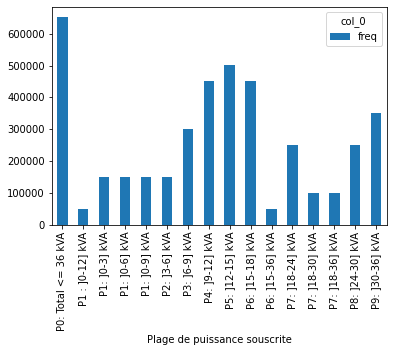

In [5]:
########## Statistiques descriptives sur les plages de puissance soucrite ##################

###Statistique Univarié 
enedis["Plage de puissance souscrite"].value_counts()
t = pd.crosstab(enedis["Plage de puissance souscrite"] , "freq")
t.plot.bar()
pd.crosstab(enedis["Plage de puissance souscrite"], "freq", normalize=True)

###Statistique bivarié 

pd.crosstab(enedis["Plage de puissance souscrite"],enedis["Région"])
pd.crosstab(enedis["Plage de puissance souscrite"],enedis["Région"],normalize=True)

## Observation : la plage de puissance P0 total<= 36kVA représente 15,85% des plages de puissance (part la plus éléve) + représente 13,21% des plages de puissances dans chaques régions 
## Problème : que représente concrètement cette plage de puissance ? pourquoi choisir celle-ci et pas une autre ? 

In [ ]:
############### Stat descriptives sur Profil de consommation #############

## Stat Univarié 
enedis["Profil"].value_counts()
t = pd.crosstab(enedis["Profil"] , "freq")
t.plot.bar()
pd.crosstab(enedis["Profil"], "freq", normalize=True)

#Stat bivarié 
pd.crosstab(enedis["Profil"],enedis["Région"],normalize=True)
pd.crosstab(enedis["Profil"],enedis["Plage de puissance souscrite"],normalize=True)

### Observation : les profil PRO1 (+PRO1WE) et PRO5 sont les plus représentés ( 12% à peu près) + tout les profils représente la même part dans chaque région et dans le profil de consommation P0 total <=36kVA
### Problème : en quoi les profils sont important pour notre analyse ? quel liens avec les plages de puissance ? pourquoi ont-il la même part dans chaque régions? 


In [ ]:
## On base l'analyse que sur les consommateurs de la plage de puissance P0 Total <= 36kVA
enedis_conso = enedis[enedis["Plage de puissance souscrite"] == "P0: Total <= 36 kVA"]
enedis_conso

In [ ]:
## Statistique descriptive consommation quotidienne moyenne pour chaque région 
## Code à optimiser 
## Méthode : on calcul la consommation pour chaque jours pour chaque région puis on fait une moyenne pour chaque région

## IDF 
enedis_conso_idf = enedis_conso[enedis["Région"] == "Île-de-France"]
conso_quotidienne_idf = enedis_conso_idf.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_idf = conso_quotidienne_idf.rename(columns = {'mean': 'idf'})

##Bretagne 
enedis_conso_Bretagne = enedis_conso[enedis["Région"] == "Bretagne"]
conso_quotidienne_Bretagne = enedis_conso_Bretagne.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_Bretagne = conso_quotidienne_Bretagne.rename(columns = {'mean': 'Bretagne'})
conso_quotidienne_Bretagne

Liste_Région = ['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté','Centre-Val de Loire', 'Grand-Est', 'Hauts-de-France', 'Normandie', 'Nouvelle Aquitaine', 'Occitanie','Pays de la Loire', "Provence-Alpes-Côte d'Azur","Île-de-France","Bretagne"]

##Auvergne-Rhône-Alpes
enedis_conso_AuvergneRA = enedis_conso[enedis["Région"] == 'Auvergne-Rhône-Alpes']
conso_quotidienne_AuvergneRA= enedis_conso_AuvergneRA.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_AuvergneRA = conso_quotidienne_AuvergneRA.rename(columns = {'mean': 'AuvergneRA'})
conso_quotidienne_AuvergneRA

##Bourgogne-france-Comté 
enedis_conso_BourgogneFC = enedis_conso[enedis["Région"] == 'Bourgogne-Franche-Comté']
conso_quotidienne_BourgogneFC= enedis_conso_BourgogneFC.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_BourgogneFC = conso_quotidienne_BourgogneFC.rename(columns = {'mean': 'BourgogneFC'})
conso_quotidienne_BourgogneFC

##Centre-Val de Loire
enedis_conso_CentreVL = enedis_conso[enedis["Région"] == 'Centre-Val de Loire']
conso_quotidienne_CentreVL= enedis_conso_CentreVL.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_CentreVL = conso_quotidienne_CentreVL.rename(columns = {'mean': 'CentreVL'})
conso_quotidienne_CentreVL

##Grand-Est
enedis_conso_GrandEst = enedis_conso[enedis["Région"] == 'Grand-Est']
conso_quotidienne_GrandEst= enedis_conso_GrandEst.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_GrandEst = conso_quotidienne_GrandEst.rename(columns = {'mean': 'GrandEst'})
conso_quotidienne_GrandEst

##Normandie
enedis_conso_Normandie = enedis_conso[enedis["Région"] == 'Normandie']
conso_quotidienne_Normandie= enedis_conso_Normandie.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_Normandie = conso_quotidienne_Normandie.rename(columns = {'mean': 'Normandie'})
conso_quotidienne_GrandEst

##haut-de-France
enedis_conso_HDF = enedis_conso[enedis["Région"] == 'Hauts-de-France']
conso_quotidienne_HDF= enedis_conso_HDF.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_HDF = conso_quotidienne_HDF.rename(columns = {'mean': 'HDF'})
conso_quotidienne_HDF

##Occitanie
enedis_conso_Occitanie = enedis_conso[enedis["Région"] == 'Occitanie']
conso_quotidienne_Occitanie= enedis_conso_Occitanie.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_Occitanie = conso_quotidienne_Occitanie.rename(columns = {'mean': 'Occitanie'})
conso_quotidienne_Occitanie

##Pays-de-la Loire
enedis_conso_PaysdeLoire = enedis_conso[enedis["Région"] == 'Pays de la Loire']
conso_quotidienne_PaysdeLoire= enedis_conso_PaysdeLoire.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_PaysdeLoire = conso_quotidienne_PaysdeLoire.rename(columns = {'mean': 'PaysdeLoire'})
conso_quotidienne_PaysdeLoire

##'Nouvelle Aquitaine'
enedis_conso_Aquitaine = enedis_conso[enedis["Région"] == 'Nouvelle Aquitaine']
conso_quotidienne_Aquitaine= enedis_conso_Aquitaine.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_Aquitaine = conso_quotidienne_Aquitaine.rename(columns = {'mean': 'Aquitaine'})
conso_quotidienne_Aquitaine

##'Nouvelle Aquitaine'
enedis_conso_ProvenceAlpesAzur = enedis_conso[enedis["Région"] == "Provence-Alpes-Côte d'Azur"]
conso_quotidienne_ProvenceAlpesAzur= enedis_conso_ProvenceAlpesAzur.groupby("date")["Total énergie soutirée (Wh)"].agg([np.mean])
conso_quotidienne_ProvenceAlpesAzur = conso_quotidienne_ProvenceAlpesAzur.rename(columns = {'mean': 'ProvenceAlpesAzur'})
conso_quotidienne_ProvenceAlpesAzur

## Consommation quotidienne par jour 
conso_quotidienne = pd.concat([conso_quotidienne_Bretagne,conso_quotidienne_idf,conso_quotidienne_PaysdeLoire,conso_quotidienne_Aquitaine,conso_quotidienne_BourgogneFC,conso_quotidienne_CentreVL,conso_quotidienne_ProvenceAlpesAzur,conso_quotidienne_HDF,conso_quotidienne_Normandie,conso_quotidienne_GrandEst,conso_quotidienne_AuvergneRA,conso_quotidienne_Occitanie], axis=1)
conso_quotidienne

## Consommation quotidienne moyenne par jour 
conso_quotidienne_moyenne = conso_quotidienne.describe()
valeur_quotidienne_moyenne = [3.433561e+07,8.227272e+07,3.834750e+07,6.487820e+07,6.487820e+07,2.837360e+07,2.423856e+07,7.148559e+07,4.751099e+07,3.268860e+07,3.579310e+07,7.440100e+07]
Liste_Région = ['BR','IDF',"PL", 'AQ', 'BFC', 'CVL', 'PACA',"HDF","NO","GE","ARA","OCC"] ## Abréviation des régions

plt.bar(Liste_Région,valeur_quotidienne_moyenne,label="Conso moyenne par jour selon les régions")
## Observation : IDF / OCCITANIE / Haut de France régions qui ont la consommation moyenne par jour la plus éléve 
## Problème: peu-être qu'il faudrait relier ça avec les types de profils / plage de puissance souscrite par région car possible qu'il y ait plus d'entreprises en IDF 



## Données méteo


**Données des températures régionales du 1er janvier 2018 au 31 octobre 2022 :**

In [7]:
meteo_reg_df=pd.read_csv("Données/temperature-quotidienne-regionale.csv",";")
meteo_reg_df


c:\Users\elelo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,date,code_insee_region,region,tmin,tmax,tmoy
0,2018-01-01T00:00:00-11,2018-01-01,11,Île-de-France,5.96,9.28,7.62
1,2018-01-01T00:00:00-28,2018-01-01,28,Normandie,5.00,8.98,6.99
2,2018-01-01T00:00:00-24,2018-01-01,24,Centre-Val de Loire,5.25,9.68,7.47
3,2018-01-02T00:00:00-11,2018-01-02,11,Île-de-France,5.32,13.60,9.46
4,2018-01-02T00:00:00-84,2018-01-02,84,Auvergne-Rhône-Alpes,3.02,11.56,7.29
...,...,...,...,...,...,...,...
32404,2022-10-30T00:00:00-93,2022-10-30,93,Provence-Alpes-Côte d'Azur,11.82,23.62,17.72
32405,2022-10-30T00:00:00-32,2022-10-30,32,Hauts-de-France,11.66,16.96,14.31
32406,2022-10-30T00:00:00-76,2022-10-30,76,Occitanie,12.33,23.24,17.78
32407,2022-10-31T00:00:00-24,2022-10-31,24,Centre-Val de Loire,11.05,21.63,16.34


In [38]:
meteo_reg_df.groupby(["region"])["tmoy"]

region
Auvergne-Rhône-Alpes          12.625447
Bourgogne-Franche-Comté       12.392335
Bretagne                      12.472563
Centre-Val de Loire           12.686350
Corse                         16.834537
Grand Est                     11.727341
Hauts-de-France               11.835523
Normandie                     11.892146
Nouvelle-Aquitaine            14.208580
Occitanie                     14.756486
Pays de la Loire              13.418436
Provence-Alpes-Côte d'Azur    15.492744
Île-de-France                 12.910201
Name: tmoy, dtype: float64

Boite à moustache des températures. Consommation moyenne quotidienne par région, chaque jour combien un foyer consomme

## Données socio économique

In [8]:
socio=pd.read_csv("Données/data_socio.csv",sep=";",header=2)
socio

,Code,Libellé,"Part des ""artisans, commerçants, chefs d'entreprise"" dans la population 2018","Part des ""employés"" dans la population 2018","Part des ""ouvriers"" dans la population 2018","Part des ""retraités"" dans la population 2018","Part des ""agriculteurs exploitants"" dans la population 2018","Part des ""professions intermédiaires"" dans la population 2018","Part des ""autres sans activité professionnelle"" dans la population 2018","Part des ""autres sans activité professionnelle"" dans la population 2018.1","Part des ""cadres et professions intellectuelles supérieures"" dans la population 2018",Médiane du revenu disponible par UC 2018,Population au dernier recensement 2018,Part des 15-29 ans 2018,Part des 30-44 ans 2018,Part des 45-59 ans 2018,Part des 60-74 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018
0,1,Guadeloupe,4.9,18.7,10.4,23.0,0.8,12.0,25.3,26.5,4.8,NaN,387629.0,16.4,16.3,23.3,17.3,8.3,28.3
1,2,Martinique,3.9,19.0,11.1,25.2,0.7,12.4,22.4,22.8,5.2,17880.0,368783.0,15.7,15.5,24.6,18.2,9.6,23.0
2,3,Guyane,3.3,15.2,10.7,7.0,0.8,10.9,46.8,51.1,5.2,NaN,276128.0,23.4,20.5,14.5,6.8,1.9,34.2
3,4,La Réunion,3.5,20.3,13.1,14.9,0.9,12.2,30.1,35.2,4.9,15440.0,855961.0,19.7,19.2,21.2,12.3,4.7,32.8
4,6,Mayotte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11,Île-de-France,3.2,16.4,8.5,19.4,0.1,15.9,18.3,20.7,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1
6,24,Centre-Val de Loire,3.2,16.0,13.9,31.0,1.0,13.8,14.1,16.2,7.1,21560.0,2572853.0,15.9,17.5,20.1,18.1,10.7,12.5
7,27,Bourgogne-Franche-Comté,3.3,15.2,14.8,31.4,1.2,13.1,14.6,17.1,6.3,21480.0,2807807.0,16.2,17.3,20.1,18.6,10.9,12.0
8,28,Normandie,3.2,16.0,14.4,30.1,1.0,13.4,15.5,17.6,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2
9,32,Hauts-de-France,2.6,16.4,14.7,25.5,0.5,13.5,19.8,23.4,7.0,20110.0,6004108.0,18.5,18.8,19.5,15.9,7.9,16.3


In [9]:
socio["Code"]=socio["Code"].astype("str")
socio.drop( socio[ (socio['Code'] == "1") | (socio['Code'] == "2") | (socio['Code'] == "3") | (socio['Code'] == "4") | (socio['Code'] == "6")].index, inplace=True)
socio

,Code,Libellé,"Part des ""artisans, commerçants, chefs d'entreprise"" dans la population 2018","Part des ""employés"" dans la population 2018","Part des ""ouvriers"" dans la population 2018","Part des ""retraités"" dans la population 2018","Part des ""agriculteurs exploitants"" dans la population 2018","Part des ""professions intermédiaires"" dans la population 2018","Part des ""autres sans activité professionnelle"" dans la population 2018","Part des ""autres sans activité professionnelle"" dans la population 2018.1","Part des ""cadres et professions intellectuelles supérieures"" dans la population 2018",Médiane du revenu disponible par UC 2018,Population au dernier recensement 2018,Part des 15-29 ans 2018,Part des 30-44 ans 2018,Part des 45-59 ans 2018,Part des 60-74 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018
5,11,Île-de-France,3.2,16.4,8.5,19.4,0.1,15.9,18.3,20.7,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1
6,24,Centre-Val de Loire,3.2,16.0,13.9,31.0,1.0,13.8,14.1,16.2,7.1,21560.0,2572853.0,15.9,17.5,20.1,18.1,10.7,12.5
7,27,Bourgogne-Franche-Comté,3.3,15.2,14.8,31.4,1.2,13.1,14.6,17.1,6.3,21480.0,2807807.0,16.2,17.3,20.1,18.6,10.9,12.0
8,28,Normandie,3.2,16.0,14.4,30.1,1.0,13.4,15.5,17.6,6.4,21200.0,3327477.0,16.9,17.7,19.9,17.8,9.9,13.2
9,32,Hauts-de-France,2.6,16.4,14.7,25.5,0.5,13.5,19.8,23.4,7.0,20110.0,6004108.0,18.5,18.8,19.5,15.9,7.9,16.3
10,44,Grand Est,2.9,16.4,14.7,27.3,0.8,13.8,17.0,20.4,7.2,21610.0,5550389.0,17.5,18.3,20.6,17.1,9.3,13.3
11,52,Pays de la Loire,3.3,15.3,14.8,29.4,1.2,14.2,13.9,15.6,7.8,21620.0,3781423.0,17.0,18.4,19.5,16.8,9.7,11.2
12,53,Bretagne,3.5,15.1,13.0,31.2,1.3,13.7,14.7,16.2,7.6,21750.0,3335414.0,16.4,17.6,20.1,18.1,10.5,11.4
13,75,Nouvelle-Aquitaine,4.0,15.9,12.1,31.9,1.3,13.1,14.7,16.7,7.1,21290.0,5979778.0,15.9,17.4,20.3,19.0,11.4,12.6
14,76,Occitanie,4.3,15.7,10.2,29.3,1.2,13.6,17.3,20.1,8.4,20740.0,5885496.0,16.8,17.7,20.0,18.1,10.7,14.5


In [10]:
socio["Code"]=pd.to_numeric(socio["Code"])

In [20]:
socio.groupby(["Libellé"]).describe()

Code                                          \
                           count  mean std   min   25%   50%   75%   max   
Libellé                                                                    
Auvergne-Rhône-Alpes         1.0  84.0 NaN  84.0  84.0  84.0  84.0  84.0   
Bourgogne-Franche-Comté      1.0  27.0 NaN  27.0  27.0  27.0  27.0  27.0   
Bretagne                     1.0  53.0 NaN  53.0  53.0  53.0  53.0  53.0   
Centre-Val de Loire          1.0  24.0 NaN  24.0  24.0  24.0  24.0  24.0   
Corse                        1.0  94.0 NaN  94.0  94.0  94.0  94.0  94.0   
Grand Est                    1.0  44.0 NaN  44.0  44.0  44.0  44.0  44.0   
Hauts-de-France              1.0  32.0 NaN  32.0  32.0  32.0  32.0  32.0   
Normandie                    1.0  28.0 NaN  28.0  28.0  28.0  28.0  28.0   
Nouvelle-Aquitaine           1.0  75.0 NaN  75.0  75.0  75.0  75.0  75.0   
Occitanie                    1.0  76.0 NaN  76.0  76.0  76.0  76.0  76.0   
Pays de la Loire             1.0  52.0 NaN  52.0  52.0  52.0  52.0  52.0   
Provence-Alpes-Côte d'Azur   1.0  93.0 NaN  93.0  93.0  93.0  93.0  93.0   
Île-de-France                1.0  11.0 NaN  11.0  11.0  11.0  11.0  11.0   

                           Part des "artisans, commerçants, chefs d'entreprise" dans la population 2018  \
                                                                                                  count   
Libellé                                                                                                   
Auvergne-Rhône-Alpes                                                      1.0                             
Bourgogne-Franche-Comté                                                   1.0                             
Bretagne                                                                  1.0                             
Centre-Val de Loire                                                       1.0                             
Corse                                                                     1.0                             
Grand Est                                                                 1.0                             
Hauts-de-France                                                           1.0                             
Normandie                                                                 1.0                             
Nouvelle-Aquitaine                                                        1.0                             
Occitanie                                                                 1.0                             
Pays de la Loire                                                          1.0                             
Provence-Alpes-Côte d'Azur                                                1.0                             
Île-de-France                                                             1.0                             

                                 ... Part des 75 ans et plus 2018        \
                           mean  ...                          75%   max   
Libellé                          ...                                      
Auvergne-Rhône-Alpes        3.9  ...                          9.4   9.4   
Bourgogne-Franche-Comté     3.3  ...                         10.9  10.9   
Bretagne                    3.5  ...                         10.5  10.5   
Centre-Val de Loire         3.2  ...                         10.7  10.7   
Corse                       5.7  ...                         11.2  11.2   
Grand Est                   2.9  ...                          9.3   9.3   
Hauts-de-France             2.6  ...                          7.9   7.9   
Normandie                   3.2  ...                          9.9   9.9   
Nouvelle-Aquitaine          4.0  ...                         11.4  11.4   
Occitanie                   4.3  ...                         10.7  10.7   
Pays de la Loire            3.3  ...                          9.7   9.7   
Provence-Alpes-Côte d'Azur  4.4  ...            

## Base de données merged

In [11]:
enedis_socio=pd.merge(enedis,socio,how='left',left_on="Code région",right_on="Code")

In [12]:
enedis_socio

,Horodate,Région,Code région,Profil,Plage de puissance souscrite,Nb points soutirage,Total énergie soutirée (Wh),Courbe Moyenne n°1 (Wh),Indice représentativité Courbe n°1 (%),Courbe Moyenne n°2 (Wh),...,"Part des ""autres sans activité professionnelle"" dans la population 2018.1","Part des ""cadres et professions intellectuelles supérieures"" dans la population 2018",Médiane du revenu disponible par UC 2018,Population au dernier recensement 2018,Part des 15-29 ans 2018,Part des 30-44 ans 2018,Part des 45-59 ans 2018,Part des 60-74 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018
0,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,ENT3 (+ ENT4 + ENT5),P0: Total <= 36 kVA,1376,2095739.0,2084.0,48,1368.0,...,18.3,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4
1,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P4: ]9-12] kVA,52691,12376840.0,443.0,8,202.0,...,18.3,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4
2,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO1 (+ PRO1WE),P8: ]24-30] kVA,8350,6545703.0,1012.0,10,474.0,...,18.3,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4
3,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO2 (+ PRO2WE + PRO6),P3: ]6-9] kVA,19759,7072016.0,693.0,13,466.0,...,18.3,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4
4,2022-09-30T23:30:00+02:00,Auvergne-Rhône-Alpes,84,PRO5,P1: ]0-3] kVA,55645,18921676.0,428.0,16,239.0,...,18.3,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108994,2022-07-06T00:00:00+02:00,Île-de-France,11,PRO2 (+ PRO2WE + PRO6),P6: ]15-18] kVA,15355,12666774.0,1613.0,13,1001.0,...,20.7,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1
4108995,2022-07-06T00:00:00+02:00,Île-de-France,11,PRO3,P4: ]9-12] kVA,370,436549.0,NaN,S,NaN,...,20.7,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1
4108996,2022-07-06T00:00:00+02:00,Île-de-France,11,PRO5,P3: ]6-9] kVA,3148,6923922.0,725.0,27,774.0,...,20.7,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1
4108997,2022-07-06T00:00:00+02:00,Île-de-France,11,RES1 (+ RES1WE),P0: Total <= 36 kVA,3476435,287893977.0,90.0,< 1,73.0,...,20.7,18.2,23860.0,12213447.0,20.0,21.2,19.4,13.2,6.8,12.1


Finalement, il faut merger les données météo et enedis sur date et région

In [13]:
enedis_final=pd.merge(enedis_socio,meteo_reg_df,how='left',left_on=["date","Code région"],right_on=["date","code_insee_region"])